In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
name = 'P2P Network'
algo_name = ['Betweenness Attack vs. Betweenness Defense',
             'Betweenness Attack vs. Degree Defense', 
             'Betweenness Attack vs. Random Defense', 
             'Degree Attack vs. Random Defense',
             'Degree Attack vs. Degree Defense',
             'Degree Attack vs. Betweenness Defense',
             'Random Attack vs. Random Defense',
             'Random Attack vs. Degree Defense',
             'Random Attack vs. Betweenness Defense'
            ]
p = [0.1, 0.05, 0.01]

save_dir = os.path.join(name, 'analysis')
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
print(save_dir)

P2P Network/analysis


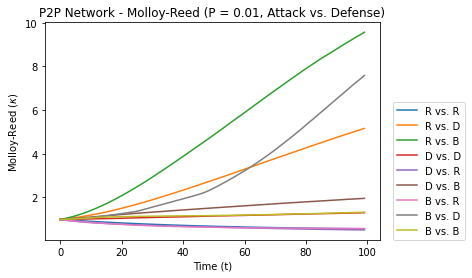

In [4]:
def molloy_reed_plot(name, p):

    m1 = np.load(os.path.join(name, "Random Attack vs. Random Defense", str(p), "molloy_reed_result.npy"))
    m2 = np.load(os.path.join(name, "Random Attack vs. Degree Defense", str(p), "molloy_reed_result.npy"))
    m3 = np.load(os.path.join(name, "Random Attack vs. Betweenness Defense", str(p), "molloy_reed_result.npy"))
    m4 = np.load(os.path.join(name, "Degree Attack vs. Degree Defense", str(p), "molloy_reed_result.npy"))
    m5 = np.load(os.path.join(name, "Degree Attack vs. Random Defense", str(p), "molloy_reed_result.npy"))
    m6 = np.load(os.path.join(name, "Degree Attack vs. Betweenness Defense", str(p), "molloy_reed_result.npy"))
    m7 = np.load(os.path.join(name, "Betweenness Attack vs. Random Defense", str(p), "molloy_reed_result.npy"))
    m8 = np.load(os.path.join(name, "Betweenness Attack vs. Degree Defense", str(p), "molloy_reed_result.npy"))
    m9 = np.load(os.path.join(name, "Betweenness Attack vs. Betweenness Defense", str(p), "molloy_reed_result.npy"))


    m1 = [(m1[i]+m1[i+1])/2 / m1[0] for i in range(0, len(m1)-1, 2)]
    m2 = [(m2[i]+m2[i+1])/2 / m2[0] for i in range(0, len(m2)-1, 2)]
    m3 = [(m3[i]+m3[i+1])/2 / m3[0] for i in range(0, len(m3)-1, 2)]
    m4 = [(m4[i]+m4[i+1])/2 / m4[0] for i in range(0, len(m4)-1, 2)]
    m5 = [(m5[i]+m5[i+1])/2 / m5[0] for i in range(0, len(m5)-1, 2)]
    m6 = [(m6[i]+m6[i+1])/2 / m6[0] for i in range(0, len(m6)-1, 2)]
    m7 = [(m7[i]+m7[i+1])/2 / m7[0] for i in range(0, len(m7)-1, 2)]
    m8 = [(m8[i]+m8[i+1])/2 / m8[0] for i in range(0, len(m8)-1, 2)]
    m9 = [(m9[i]+m9[i+1])/2 / m9[0] for i in range(0, len(m9)-1, 2)]
    
    fig_name = 'Molloy Reed (p=' + str(p) + ').png'

    plt.figure()
    plt.plot(np.arange(len(m1)), m1, label = "R vs. R")
    plt.plot(np.arange(len(m2)), m2, label = "R vs. D")
    plt.plot(np.arange(len(m3)), m3, label = "R vs. B")
    plt.plot(np.arange(len(m4)), m4, label = "D vs. D")
    plt.plot(np.arange(len(m5)), m5, label = "D vs. R")
    plt.plot(np.arange(len(m6)), m6, label = "D vs. B")
    plt.plot(np.arange(len(m7)), m7, label = "B vs. R")
    plt.plot(np.arange(len(m8)), m8, label = "B vs. D")
    plt.plot(np.arange(len(m9)), m9, label = "B vs. B")
#     plt.axhline(y=2, color='r', linestyle='-', label = 'Threshold')
    plt.xlabel('Time (t)')
    plt.ylabel('Molloy-Reed ($\kappa$)')
    plt.title('{} - Molloy-Reed (P = {}, Attack vs. Defense)'.format(name, p))

#     plt.ylim(0,200)
#     plt.legend(ncol=10, loc=(1.04, 0))
    plt.legend(loc=(1.04, 0))

#     plt.savefig(os.path.join(save_dir, fig_name), format="PNG", dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    
molloy_reed_plot(name, 0.01)

In [19]:
# network visualization

def generate_visualization(name, algo, p):
    
    data = nx.read_gml(os.path.join(name, algo, str(p), "visualization_t100.gml"))
    data_prime = sorted(data.degree, key=lambda x: x[1], reverse=True)
    data_prime = data_prime[:int(len(data_prime) * 0.01)]
    g_sub = data.subgraph([i[0] for i in data_prime])
    
    save_dir = os.path.join(name, 'analysis', algo, str(p))
    if not os.path.isdir(save_dir):
        os.makedirs(save_dir)    
    
    nx.draw(g_sub, node_size=10, width=0.1)
    plt.savefig(os.path.join(save_dir, "Visual.png"), format="PNG", dpi=300)
    plt.close()

In [20]:
# degree distribution plot

def deg_dist_plot(name, algo, p):
    
    data_0 = np.load(os.path.join(name, algo, str(p), "degree dist_t0.npy"))
    data_50 = np.load(os.path.join(name, algo, str(p), "degree dist_t50.npy"))
    data_100 = np.load(os.path.join(name, algo, str(p), "degree dist_t100.npy"))
    
    data_0 =[float('nan') if i==0 else i for i in data_0]
    data_50= [float('nan') if i==0 else i for i in data_50]
    data_100= [float('nan') if i==0 else i for i in data_100]
    
    save_dir = os.path.join(name, 'analysis', algo, str(p))
    if not os.path.isdir(save_dir):
        os.makedirs(save_dir)    
    
    plt.figure()
    plt.scatter(np.arange(len(data_0)), data_0, label = 'Time 0')
    plt.scatter(np.arange(len(data_50)), data_50, label = 'Time 50')
    plt.scatter(np.arange(len(data_100)), data_100, label = 'Time 100')
    plt.xlabel('Degree')
    plt.ylabel('Frequency (Number of Nodes)')
    plt.title('{} - Degree Distribution \n (P = {}, {})'.format(name, p, algo))
    plt.legend(loc="upper right")
    plt.savefig(os.path.join(save_dir, "Degree distribution.png"), format="PNG", dpi=300)
    plt.show()
    plt.close()

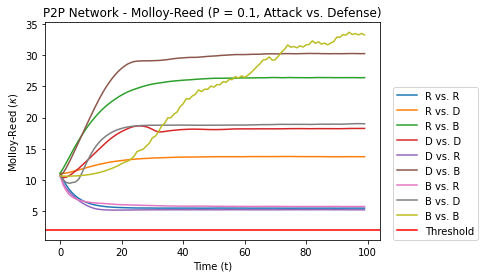

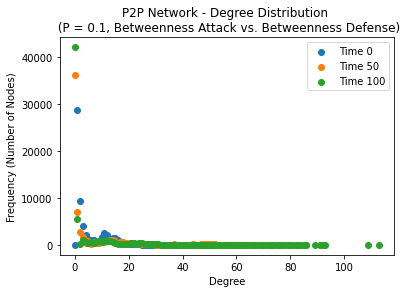

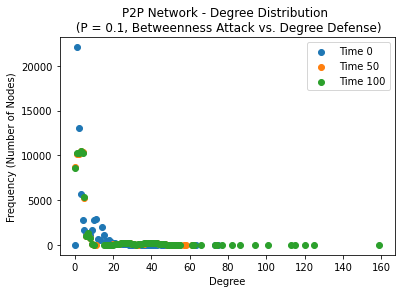

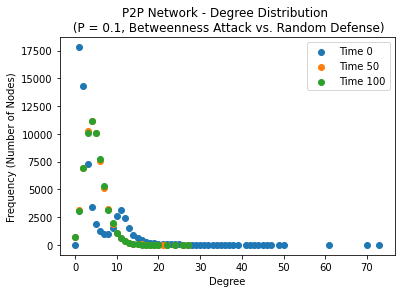

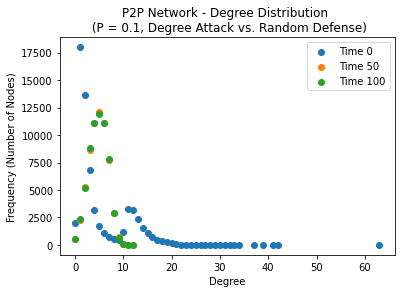

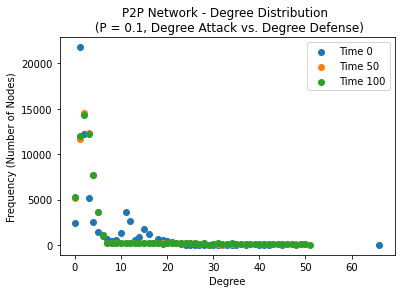

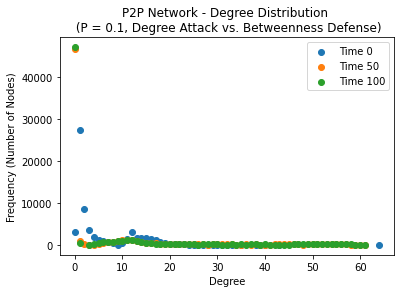

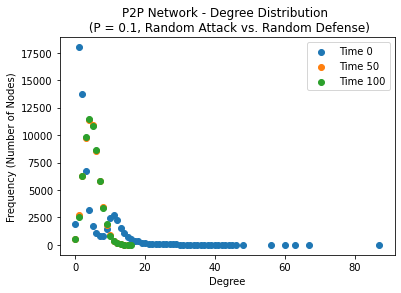

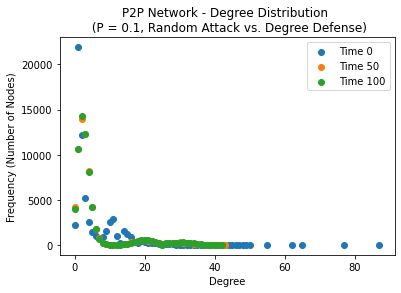

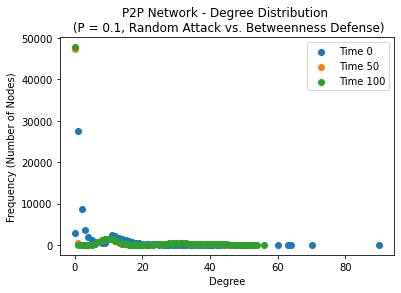

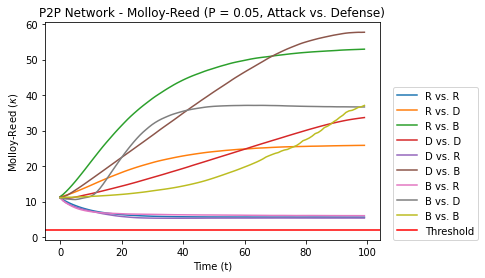

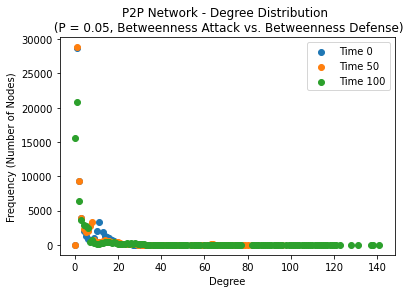

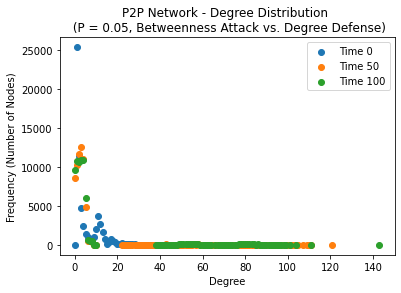

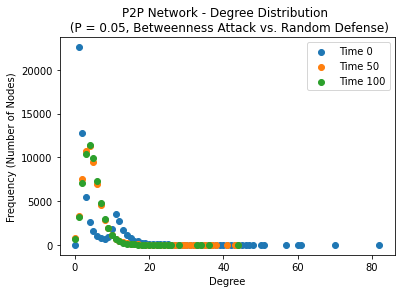

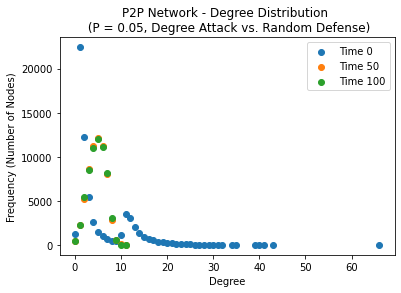

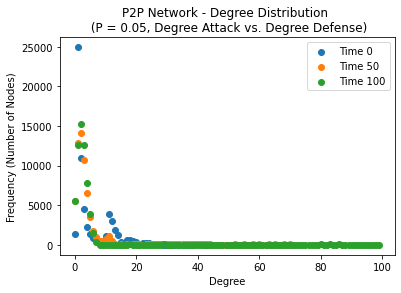

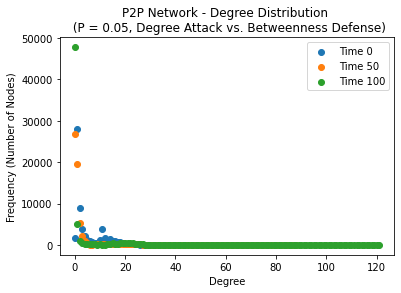

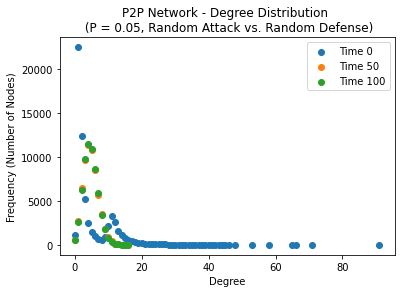

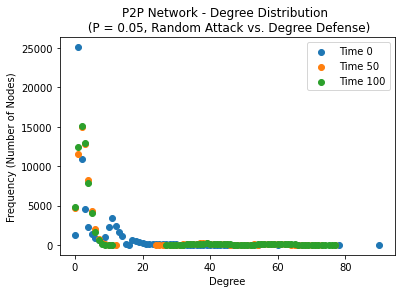

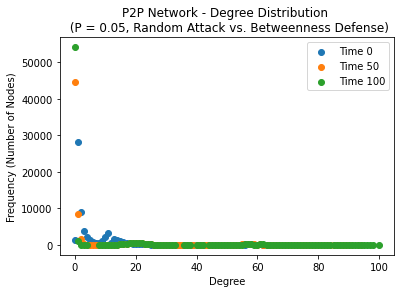

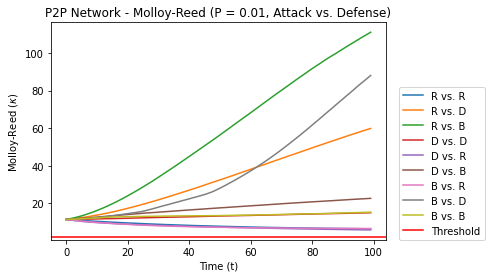

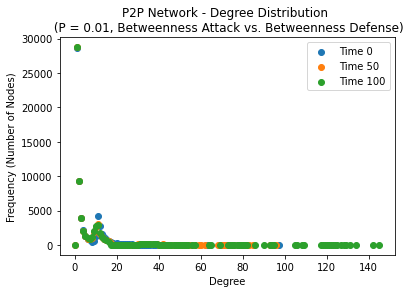

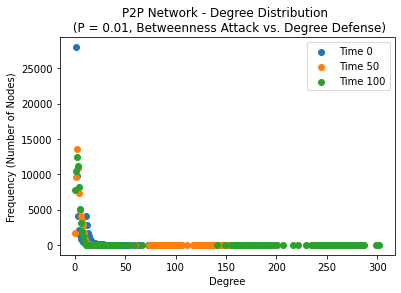

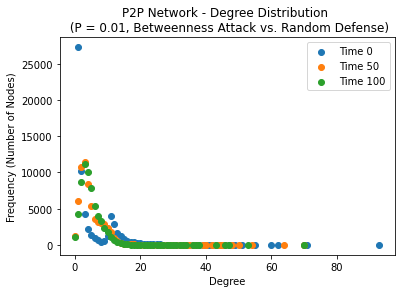

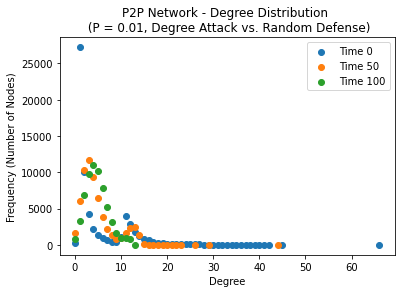

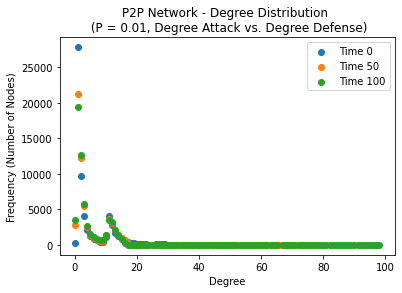

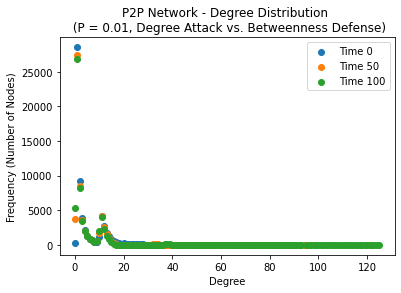

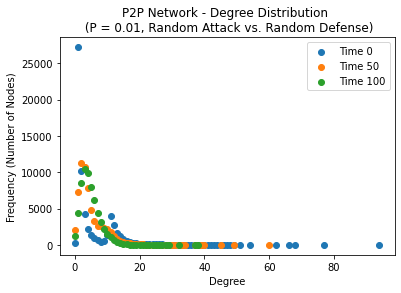

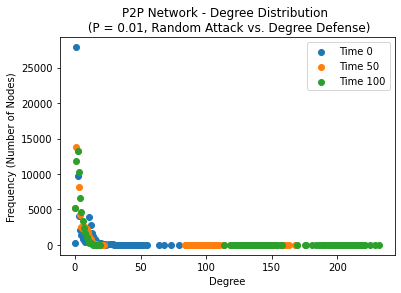

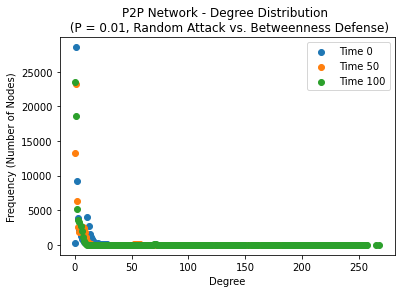

In [21]:
for j in p:
    molloy_reed_plot(name, j)
    for i in algo_name:
#         print(i, j)
        generate_visualization(name, i, j)
        deg_dist_plot(name, i, j)

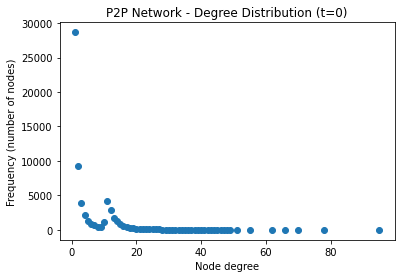

In [15]:
# degree distribution (initial)

data = nx.read_edgelist('P2P network.txt', create_using=nx.DiGraph(), nodetype = int)
save_dir = os.path.join(name, 'analysis')
fig_name = 'Degree distribution of P2P Network (t=0).png'

def deg_dist_plot_helper(data):
#     Helper function to remove the zeros in degree dstribution from the plot
    return [float('nan') if i==0 else i for i in data]

y = nx.degree_histogram(data)
y = deg_dist_plot_helper(y)
x = np.arange(len(y)).tolist()
plt.figure()
plt.plot(x, y, 'o')
plt.title('P2P Network - Degree Distribution (t=0)')
plt.xlabel('Node degree')
plt.ylabel('Frequency (number of nodes)')
plt.savefig(os.path.join(save_dir, fig_name), format="PNG", dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

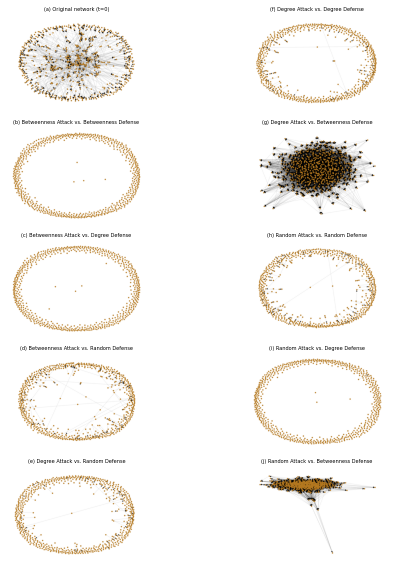

In [3]:
Image0 = cv2.imread(os.path.join(name, 'analysis', algo_name[0], str(p[1]), 'Visual.png'))
Image1 = cv2.imread(os.path.join(name, 'analysis', algo_name[1], str(p[1]), 'Visual.png'))
Image2 = cv2.imread(os.path.join(name, 'analysis', algo_name[2], str(p[1]), 'Visual.png'))
Image3 = cv2.imread(os.path.join(name, 'analysis', algo_name[3], str(p[1]), 'Visual.png'))
Image4 = cv2.imread(os.path.join(name, 'analysis', algo_name[4], str(p[1]), 'Visual.png'))
Image5 = cv2.imread(os.path.join(name, 'analysis', algo_name[5], str(p[1]), 'Visual.png'))
Image6 = cv2.imread(os.path.join(name, 'analysis', algo_name[6], str(p[1]), 'Visual.png'))
Image7 = cv2.imread(os.path.join(name, 'analysis', algo_name[7], str(p[1]), 'Visual.png'))
Image8 = cv2.imread(os.path.join(name, 'analysis', algo_name[8], str(p[1]), 'Visual.png'))
Image9 = cv2.imread(os.path.join(name, 'analysis', 'Visual (t=0).png'))

plt.figure()
figsize=(10, 10)
fontsize=5
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(8, 8))

ax[0,0].imshow(Image9)
ax[0,0].set_title('(a) Original network (t=0)', fontsize=fontsize)
ax[0,0].axis('off')

ax[1,0].imshow(Image0)
ax[1,0].set_title('(b) {}'.format(algo_name[0]), fontsize=fontsize)
ax[1,0].axis('off')

ax[2,0].imshow(Image1)
ax[2,0].set_title('(c) {}'.format(algo_name[1]), fontsize=fontsize)
ax[2,0].axis('off')

ax[3,0].imshow(Image2)
ax[3,0].set_title('(d) {}'.format(algo_name[2]), fontsize=fontsize)
ax[3,0].axis('off')

ax[4,0].imshow(Image3)
ax[4,0].set_title('(e) {}'.format(algo_name[3]), fontsize=fontsize)
ax[4,0].axis('off')

ax[0,1].imshow(Image4)
ax[0,1].set_title('(f) {}'.format(algo_name[4]), fontsize=fontsize)
ax[0,1].axis('off')

ax[1,1].imshow(Image5)
ax[1,1].set_title('(g) {}'.format(algo_name[5]), fontsize=fontsize)
ax[1,1].axis('off')

ax[2,1].imshow(Image6)
ax[2,1].set_title('(h) {}'.format(algo_name[6]), fontsize=fontsize)
ax[2,1].axis('off')

ax[3,1].imshow(Image7)
ax[3,1].set_title('(i) {}'.format(algo_name[7]), fontsize=fontsize)
ax[3,1].axis('off')

ax[4,1].imshow(Image8)
ax[4,1].set_title('(j) {}'.format(algo_name[8]), fontsize=fontsize)
ax[4,1].axis('off')

fig.tight_layout()
plt.savefig('Visualization_complete.png', format="png", dpi=300)
plt.show()

<Figure size 432x288 with 0 Axes>

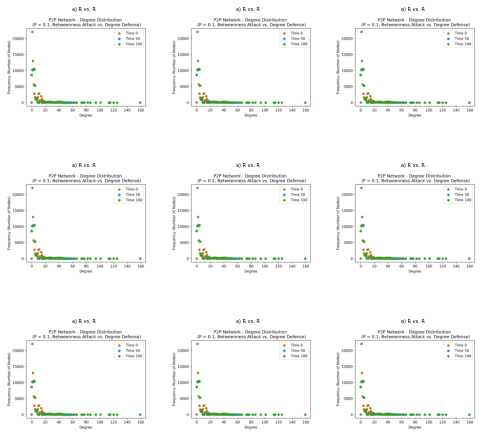

In [5]:
# Image1 = cv2.imread(os.path.join(name, 'analysis', algo_name[0], str(p[0]), 'Degree distribution.png'))
# Image2 = cv2.imread(os.path.join(name, 'analysis', algo_name[0], str(p[0]), 'Degree distribution.png'))
# Image3 = cv2.imread(os.path.join(name, 'analysis', algo_name[0], str(p[0]), 'Degree distribution.png'))
# Image4 = cv2.imread(os.path.join(name, 'analysis', algo_name[0], str(p[0]), 'Degree distribution.png'))
# Image5 = cv2.imread(os.path.join(name, 'analysis', algo_name[0], str(p[0]), 'Degree distribution.png'))
# Image6 = cv2.imread(os.path.join(name, 'analysis', algo_name[0], str(p[0]), 'Degree distribution.png'))
# Image7 = cv2.imread(os.path.join(name, 'analysis', algo_name[0], str(p[0]), 'Degree distribution.png'))
# Image8 = cv2.imread(os.path.join(name, 'analysis', algo_name[0], str(p[0]), 'Degree distribution.png'))
# Image9 = cv2.imread(os.path.join(name, 'analysis', algo_name[0], str(p[0]), 'Degree distribution.png'))

# plt.figure()
# figsize=(10, 10)
# fontsize=5
# fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(7, 7))

# for i in range(3):
#     for j in range(3):
#         ax[i,j].imshow(Image1)
#         ax[i,j].set_title('a) R vs. R', fontsize=fontsize)
#         ax[i,j].axis('off')

# fig.tight_layout()
# plt.savefig('Degree distribution.png', format="png", dpi=300)
# plt.show()

<Figure size 432x288 with 0 Axes>

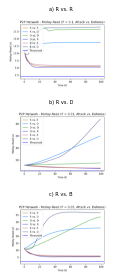

In [6]:
# Image1 = cv2.imread(os.path.join(name, 'analysis', 'Molloy Reed_p=0.1.png'))
# Image2 = cv2.imread(os.path.join(name, 'analysis', 'Molloy Reed_p=0.01.png'))
# Image3 = cv2.imread(os.path.join(name, 'analysis', 'Molloy Reed_p=0.05.png'))

# plt.figure()
# figsize=(8, 8)
# fontsize=5
# fig, ax = plt.subplots(3,1)

# ax[0].imshow(Image1)
# ax[0].set_title('a) R vs. R', fontsize=fontsize)
# ax[0].axis('off')

# ax[1].imshow(Image2)
# ax[1].set_title('b) R vs. D', fontsize=fontsize)
# ax[1].axis('off')

# ax[2].imshow(Image3)
# ax[2].set_title('c) R vs. B', fontsize=fontsize)
# ax[2].axis('off')


# fig.tight_layout()
# plt.savefig('Molloy Reed_complete.png', format="png", dpi=300)
# plt.show()

In [5]:
# data = nx.read_gml("P2P network.gml")
# data_prime = sorted(data.degree, key=lambda x: x[1], reverse=True)
# data_prime = data_prime[:int(len(data_prime) * 0.01)]
# g_sub = data.subgraph([i[0] for i in data_prime])

# nx.draw(g_sub, node_size=10, width=0.1)
# plt.savefig(os.path.join(save_dir, "Visual (t=0).png"), format="PNG", dpi=300)
# plt.close()